## What it does:

This packages receives a data frame and function that could have multiplicative terms and runs setpwise selection from this package.

https://github.com/talhahascelik/python_stepwiseSelection

## Install package

In [ ]:
%%capture
!pip3 install git+git://github.com/gabriela-plantie/stepwise_formula

In [24]:
from stepwise_formula.stepwise import stepwise

In [4]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random

## create table with simulated data

In [5]:

def create_df(seed):
    np.random.seed(seed)
    x1=np.random.normal(0,1,1000)
    x2=np.random.normal(0,1,1000)
    x3=np.random.normal(0,1,1000)
    x4=np.random.normal(0,1,1000)/5

    z=1 + 2*x1 + x2 + 2*x2*x3 +x4
    pr=1/(1+np.exp(-z))
    y=sc.stats.binom.rvs(1, pr, size=1000)
    y1= z+x4
    df = pd.DataFrame(data={'y':y, 'y1': y1,'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})
    return [df,z]

In [6]:
df= create_df(30)[0]
z= create_df(30)[1]

## Define formula

In [7]:
formula = 'y ~  x2*x3 + x1:x4 '

## Run stepwise using formula

In [8]:
mod = stepwise(formula, df, 'logistic')

{x1*x4, 'x2', x2*x3, 'x3'}
Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.541247
         Iterations 6
Eliminated : x3
Optimization terminated successfully.
         Current function value: 0.541255
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                  0.1806
Time:                        13:36:53   Log-Likelihood:                -541.26
converged:                       True   LL-Null:                       -660.53
Covariance Type:            nonrobust   LLR p-value:                 1.954e-51
                 coef    std err          z      P>|z|

In [9]:
mod.model_type

'logistic'

In [10]:
mod.model

## Predicction on another dataset

In [11]:
testResults= mod.predict(df, alpha=0.05)

In [12]:
testResults

In [13]:
t=testResults.testDataframe

In [14]:
t['pred'] = testResults.prediction

In [15]:
t

,intercept,x1*x4,x2,x2*x3,pred
0,1,-0.142610,0.452175,0.139584,0.715952
1,1,-0.016467,1.134899,-0.830760,0.558363
2,1,-0.178077,0.077442,-0.046015,0.592518
3,1,0.098642,0.226821,-0.494669,0.558039
4,1,-0.051086,0.526648,0.189129,0.761861
...,...,...,...,...,...
995,1,-0.107829,0.897219,-0.164495,0.702047
996,1,-0.017205,-0.577262,-0.256417,0.465798
997,1,-0.002307,0.904900,0.125015,0.801311
998,1,-0.008264,1.120783,0.405615,0.871228


## Plot model logit vs original logit

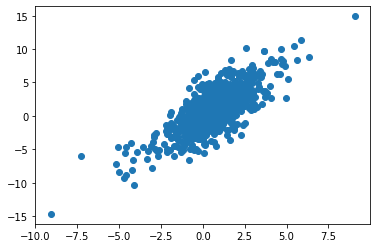

In [16]:
plt.scatter(list(map(lambda p: np.log(p/(1-p)), t['pred'])) , z)

## Linear

In [17]:
formula = 'y1 ~  x2*x3+x4 '

In [18]:
mod = stepwise(formula, df, 'linear')

{'x4', 'x2', x2*x3, 'x3'}
Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : x3
Regained :  x3
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     310.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          3.02e-173
Time:                        13:37:01   Log-Likelihood:                -2091.6
No. Observations:                1000   AIC:                             4193.
Df Residuals:                     995   BIC:                             4218.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [19]:
testResults= mod.predict(df, alpha=0.05)

In [20]:
testResults.testDataframe

,intercept,x4,x2,x2*x3,x3
0,1,0.112820,0.452175,0.139584,0.308695
1,1,-0.010777,1.134899,-0.830760,-0.732013
2,1,0.183450,0.077442,-0.046015,-0.594185
3,1,0.209627,0.226821,-0.494669,-2.180876
4,1,0.507330,0.526648,0.189129,0.359118
...,...,...,...,...,...
995,1,-0.128762,0.897219,-0.164495,-0.183339
996,1,-0.064541,-0.577262,-0.256417,0.444195
997,1,-0.005238,0.904900,0.125015,0.138153
998,1,-0.056286,1.120783,0.405615,0.361903


In [22]:
testResults.prediction

0      2.019718
1      0.524111
2      1.523769
3      0.972228
4      3.163633
         ...   
995    1.297642
996   -0.267152
997    2.168642
998    2.808699
999   -0.567166
Name: mean, Length: 1000, dtype: float64

In [23]:
testResults.intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.019718,0.078220,1.866224,2.173213,-1.838213,5.877650
1,0.524111,0.114424,0.299570,0.748652,-3.337300,4.385522
2,1.523769,0.089071,1.348980,1.698557,-2.335069,5.382606
3,0.972228,0.161526,0.655258,1.289198,-2.895658,4.840114
4,3.163633,0.169810,2.830406,3.496860,-0.705619,7.032886
...,...,...,...,...,...,...
995,1.297642,0.094512,1.112177,1.483108,-2.561693,5.156978
996,-0.267152,0.083674,-0.431349,-0.102954,-4.125524,3.591220
997,2.168642,0.085525,2.000813,2.336472,-1.689886,6.027170
998,2.808699,0.102713,2.607141,3.010258,-1.051443,6.668842


In [ ]:
#jupyter nbconvert README.ipynb --to markdown